web scraping dos imoveis-comerciais do site chavesnamao

In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Web Scraping

O objetivo desse notebook é retirar os valores de 1485 instâncias de salas comerciais à venda em florianópolis do site chavesnamão. Os dados retirados podem ser visto na imagem abaixo e foram organizados e salvos em um dataframe

## Valores retirados:

Para cada instancia do Dataframe:
    
   **Azul**: Refere-se as caracteristicas
    
   **Verde**: Refere-se a descrição 
    
   **Roxo**: Refere-se ao bairro
    
   **Amarelo**: Refere-se ao preço
    
   **Marrom**: Refere-se ao preço condominio
    
   **Vermelho**: Refere-s ao endereço

# Observações:

Nem todas caracteristicas são semelhantes, algumas possuem só o m² com o número de banheiros. As instâncias completas possuem o m², o número de banheiro e o número de salas

Quando não especificado o preço do condominio, optei por marcar o preço como zero

A descrição também não é uniforme, ela varia de acordo com a pessoa que anuncia

Tomei cuidado para filtrar somente os imóveis a venda, excluindo os de aluguel

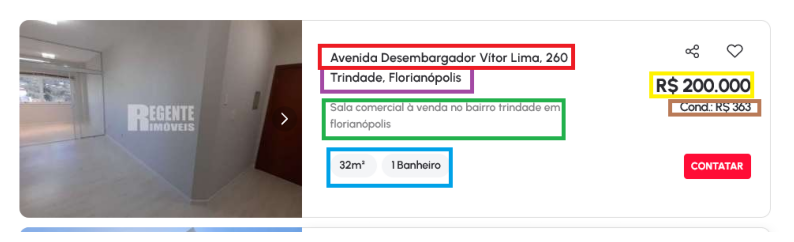

In [2]:

# Caminho para a imagem
caminho_imagem = r'C:\Users\joao\Desktop\imoveis\oquefoiretirado.png'

# Carregar a imagem
imagem = mpimg.imread(caminho_imagem)

plt.figure(figsize=(10, 8))

# Exibir a imagem
plt.imshow(imagem)
plt.axis('off')  # Desativa os eixos
plt.show()

In [444]:
url = 'https://www.chavesnamao.com.br/imoveis-comerciais/sc-florianopolis/?pg=100'

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

In [378]:
#caracteristicas exemplo (32m² 1  Banheiro) 
caracteristicas = soup.find_all('ul' , class_ = 'list im')
lista_caracteristicas = []
for i in caracteristicas:
    lista_caracteristicas.append(i.text)
    print(i.text)

In [445]:
#descrição exemplo (Sala comercial à venda no bairro trindade em florianópolis) 
descrição = soup.find_all('h2')
lista_descrição = []
for i in descrição:
    lista_descrição.append(i.text)
    print(i.text)

You are unable to access chavesnamao.com.br
Why have I been blocked?
What can I do to resolve this?


3

In [364]:
#bairro exem(Trindade, Florianópolis)
#valor exemp(R$ 200.000)
bairro = []
valor = []
for i in soup.find_all('b'):
    texto = i.text.strip()
    try:
        if texto[0].isnumeric():
            pass
        else:
            if texto.startswith('R'):
                valor.append(texto)
                print(texto)
            else:
                bairro.append(texto)
                print(texto)
    except:
        pass

Trindade, Florianópolis
R$ 200.000
João Paulo, Florianópolis
R$ 2.194
Estreito, Florianópolis
R$ 600.000
Estreito, Florianópolis
R$ 4.800
Centro, Florianópolis
R$ Confira
Centro, Florianópolis
R$ 1.100
Centro, Florianópolis
R$ 280.000
Itacorubi, Florianópolis
R$ 150
Estreito, Florianópolis
R$ 659.000
Centro, Florianópolis
R$ 1.200
Centro, Florianópolis
R$ 520.000
Lagoa da Conceição, Florianópolis
R$ 1.700
Canto, Florianópolis
R$ 375.000
Estreito, Florianópolis
R$ 3.527
João Paulo, Florianópolis
R$ 1.700


In [365]:
#condominio exemp(R$ 363)
condominio = []
for i in soup.find_all('p' , {'class': 'price'}):
    try:
        print(i.find_all('small' , {'class' : 'cond'})[0].text.split(': ')[1])
        condominio.append(i.find_all('small' , {'class' : 'cond'})[0].text.split(': ')[1])
    except:
        print('R$ 0')
        condominio.append('R$ 0')

R$ 363
R$ 365
R$ 990
R$ 0
R$ 0
R$ 573
R$ 395
R$ 0
R$ 386
R$ 510
R$ 850
R$ 750
R$ 268
R$ 251
R$ 465


In [366]:
#endereço exp(Avenida Desembargador Vítor Lima, 260 )
endereço = []
for i in soup.find_all('small', class_=lambda x: x != 'cond'):
    if len(i.text) == 0:
        pass
    else:
        print(i.text)
        endereço.append(i.text)

Avenida Desembargador Vítor Lima, 260 
Rodovia José Carlos Daux, 500 
Rua Souza Dutra, 145 
Rua Tereza Cristina, 545 
Rua Desembargador Urbano Salles, 99 
Avenida Prefeito Osmar Cunha, 183 
Rua Esteves Júnior, 50 
Rua Patrício Farias, 55 
Avenida Santa Catarina, 1197 
Avenida Av.pref. Osmar Cunha, 183 
Avenida Rio Branco, -- 
Rua Henrique Véra do Nascimento, 610 
Rua General Liberato Bittencourt, 1475 
Rua Rua General Liberato Bittencourt, 1475 
Endereço não disponível 


In [439]:
url_base = 'https://www.chavesnamao.com.br/imoveis-comerciais/sc-florianopolis/'

# Número máximo de páginas desejado
max_paginas = 99

# Lista para armazenar as URLs completas
urls_completas = []

# Adicionando a URL base à lista de URLs completas
urls_completas.append(url_base)

# Adicionando URLs com números de página à lista de URLs completas
for pagina in range(2, max_paginas + 1):
    url_pagina = f'{url_base}?pg={pagina}'
    urls_completas.append(url_pagina)

# Imprimindo a lista de URLs completas
urls = urls_completas

In [418]:
lista_caracteristicas = []
lista_descrição = []
bairro = []
valor = []
condominio = []
endereço = []
for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    for i in soup.find_all('ul' , class_ = 'list im'):
        lista_caracteristicas.append(i.text)
    for i in soup.find_all('h2'):
        if i.text == 'Imóveis comerciais nos bairros de Florianópolis':
            pass
        else:
            lista_descrição.append(i.text)
    for i in soup.find_all('b'):
        texto = i.text.strip()
        try:
            if texto[0].isnumeric():
                pass
            else:
                if texto.startswith('R$'):
                    valor.append(texto)
                else:
                    bairro.append(texto)
        except:
            pass
    for i in soup.find_all('p' , {'class': 'price'}):
        try:
            condominio.append(i.find_all('small' , {'class' : 'cond'})[0].text.split(': ')[1])
        except:
            condominio.append('R$ 0')
    for i in soup.find_all('small', class_=lambda x: x != 'cond'):
        if len(i.text) == 0:
            pass
        else:
            endereço.append(i.text)

In [403]:
import pandas as pd

In [426]:
frame = pd.DataFrame([lista_caracteristicas , lista_descrição , bairro , valor , condominio , endereço]).T

In [435]:
frame = frame.iloc[:1485,:]

In [437]:
frame

,0,1,2,3,4,5
0,32m² 1 Banheiro,Sala comercial à venda no bairro trindade em f...,"Trindade, Florianópolis",R$ 200.000,R$ 363,"Avenida Desembargador Vítor Lima, 260"
1,36m² 1 Sala 1 Banheiro,Sala comercial com 1 sala para alugar na rodov...,"João Paulo, Florianópolis",R$ 2.194,R$ 365,"Rodovia José Carlos Daux, 500"
2,81m² 2 Salas 2 Banheiros2 Garagens,"Sala à venda, 81 m² por r$ 600.000,00 - estrei...","Estreito, Florianópolis",R$ 600.000,R$ 990,"Rua Souza Dutra, 145"
3,198m² 2 Salas 1 Banheiro3 Garagens,"Loja 03 ambientes, 03 vagas, 01 wc - estreito ...","Estreito, Florianópolis",R$ 4.800,R$ 0,"Rua Tereza Cristina, 545"
4,--m²,Prédio à venda na rua desembargador urbano sal...,"Centro, Florianópolis",R$ Confira,R$ 0,"Rua Desembargador Urbano Salles, 99"
...,...,...,...,...,...,...
1480,42m²,Sala comercial à venda no bairro centro em flo...,"Centro, Florianópolis",R$ 240.000,R$ 515,"Rua Marechal Guilherme, 147"
1481,--m² 1 Banheiro1 Garagem,Sala comercial para alugar na avenida dos salm...,"Jurerê Internacional, Florianópolis",R$ 3.800,R$ 450,"Avenida dos Salmões, 230"
1482,803m² 18 Salas 19 Banheiros22 Garagens,Pousada em lagoinha,"Praia da Lagoinha, Florianópolis",R$ 4.100.000,R$ 0,"Jornalista Jaime De Arruda Ramos, 580"
1483,36m² 2 Salas 1 Banheiro,Sala comercial com 2 salas para alugar na rua ...,"Centro, Florianópolis",R$ 950,R$ 520,"Rua Conselheiro Mafra, 220"


In [438]:
frame.columns = ['caracteristicas' , 'descrição' , 'bairro' , 'preço' , 'condominio' , 'endereço']
nome_arquivo = 'imoveispg0_99.xlsx'
frame.to_excel(nome_arquivo, index=False)  # Se você quiser incluir o índice, defina index=True

In [448]:
frame.columns = ['caracteristicas' , 'descrição' , 'bairro' , 'preço' , 'condominio' , 'endereço']

In [521]:
frame

,caracteristicas,descrição,bairro,preço,condominio,endereço
0,32m² 1 Banheiro,Sala comercial à venda no bairro trindade em f...,"Trindade, Florianópolis",R$ 200.000,R$ 363,"Avenida Desembargador Vítor Lima, 260"
1,36m² 1 Sala 1 Banheiro,Sala comercial com 1 sala para alugar na rodov...,"João Paulo, Florianópolis",R$ 2.194,R$ 365,"Rodovia José Carlos Daux, 500"
2,81m² 2 Salas 2 Banheiros2 Garagens,"Sala à venda, 81 m² por r$ 600.000,00 - estrei...","Estreito, Florianópolis",R$ 600.000,R$ 990,"Rua Souza Dutra, 145"
3,198m² 2 Salas 1 Banheiro3 Garagens,"Loja 03 ambientes, 03 vagas, 01 wc - estreito ...","Estreito, Florianópolis",R$ 4.800,R$ 0,"Rua Tereza Cristina, 545"
4,--m²,Prédio à venda na rua desembargador urbano sal...,"Centro, Florianópolis",R$ Confira,R$ 0,"Rua Desembargador Urbano Salles, 99"
...,...,...,...,...,...,...
1480,42m²,Sala comercial à venda no bairro centro em flo...,"Centro, Florianópolis",R$ 240.000,R$ 515,"Rua Marechal Guilherme, 147"
1481,--m² 1 Banheiro1 Garagem,Sala comercial para alugar na avenida dos salm...,"Jurerê Internacional, Florianópolis",R$ 3.800,R$ 450,"Avenida dos Salmões, 230"
1482,803m² 18 Salas 19 Banheiros22 Garagens,Pousada em lagoinha,"Praia da Lagoinha, Florianópolis",R$ 4.100.000,R$ 0,"Jornalista Jaime De Arruda Ramos, 580"
1483,36m² 2 Salas 1 Banheiro,Sala comercial com 2 salas para alugar na rua ...,"Centro, Florianópolis",R$ 950,R$ 520,"Rua Conselheiro Mafra, 220"
